In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from config import league_id, year, SWID, espn_s2
%matplotlib inline


In [15]:
url = f"https://fantasy.espn.com/apis/v3/games/ffl/seasons/{year}/segments/0/leagues/{league_id}"

response1 = requests.get(url,
                        cookies={"swid": SWID,
                                 "espn_s2": espn_s2},
                        params={"view":"mBoxscore"}).json()


In [21]:
week = []
home_id = []
home_score = []
away_id = []
away_score = []

for game in response1['schedule']:
    
    if game['matchupPeriodId'] < 14:
        
        week.append(game['matchupPeriodId'])
        home_id.append(game['home']['teamId'])
        home_score.append(game['home']['totalPoints'])
        away_id.append(game['away']['teamId'])
        away_score.append(game['away']['totalPoints'])
        

In [62]:
regular_season=pd.DataFrame({'week':week,
                             'home_id':home_id,
                             'home_score':home_score,
                             'away_id':away_id,
                             'away_score':away_score})

regular_season.to_csv('CSV/regular_season.csv',index=False)
regular_season

,week,home_id,home_score,away_id,away_score
0,1,7,114.50,9,87.00
1,1,11,99.70,5,147.98
2,1,1,115.66,3,83.04
3,1,12,107.90,4,123.44
4,1,6,118.30,10,130.12
...,...,...,...,...,...
73,13,5,122.40,12,141.66
74,13,3,79.96,10,95.14
75,13,1,135.58,2,106.30
76,13,11,85.42,8,155.78


In [23]:
response2 = requests.get(url,
                        cookies={"swid": SWID,
                                 "espn_s2": espn_s2}).json()['teams']


In [24]:
team_id = []
team_name = []

for team in response2:
    team_id.append(team['id'])
    team_name.append(team['location']+team['nickname'])
    

In [56]:
teams = pd.DataFrame({"team_id":team_id,
                      "team_name": team_name})

teams.to_csv('CSV/teams.csv',index=False)
teams


,team_id,team_name
0,1,Batman andDobbins
1,2,JOEVID-19
2,3,Teamkoopman
3,4,ChipMunk
4,5,The Champs
5,6,Deshaun Of The Dead
6,7,SuccessStory
7,8,It's a Cook Out
8,9,Stevas Back
9,10,TeamInyoface


In [26]:
merge1 = pd.merge(regular_season, teams, how='outer', left_on='home_id', right_on='team_id', sort=False)
merge2 = pd.merge(merge1, teams, how='outer', left_on='away_id', right_on='team_id', sort=False, suffixes=('_home','_away'))

merge2

,week,home_id,home_score,away_id,away_score,team_id_home,team_name_home,team_id_away,team_name_away
0,1,7,114.50,9,87.00,7,SuccessStory,9,Stevas Back
1,5,11,111.34,9,86.74,11,Pinty Pants,9,Stevas Back
2,11,12,117.80,9,86.74,12,TheFootball Team,9,Stevas Back
3,7,6,169.80,9,67.12,6,Deshaun Of The Dead,9,Stevas Back
4,3,3,143.90,9,118.50,3,Teamkoopman,9,Stevas Back
...,...,...,...,...,...,...,...,...,...
73,11,6,96.26,1,115.34,6,Deshaun Of The Dead,1,Batman andDobbins
74,12,8,98.02,1,122.30,8,It's a Cook Out,1,Batman andDobbins
75,4,9,89.54,1,126.02,9,Stevas Back,1,Batman andDobbins
76,7,2,108.98,1,104.56,2,JOEVID-19,1,Batman andDobbins


In [27]:
season = merge2[['week','team_name_home', 'home_score','team_name_away','away_score']]
season

,week,team_name_home,home_score,team_name_away,away_score
0,1,SuccessStory,114.50,Stevas Back,87.00
1,5,Pinty Pants,111.34,Stevas Back,86.74
2,11,TheFootball Team,117.80,Stevas Back,86.74
3,7,Deshaun Of The Dead,169.80,Stevas Back,67.12
4,3,Teamkoopman,143.90,Stevas Back,118.50
...,...,...,...,...,...
73,11,Deshaun Of The Dead,96.26,Batman andDobbins,115.34
74,12,It's a Cook Out,98.02,Batman andDobbins,122.30
75,4,Stevas Back,89.54,Batman andDobbins,126.02
76,7,JOEVID-19,108.98,Batman andDobbins,104.56


In [28]:
# pd.concat([season.loc[season['Team_Name_Home'] == 'TheFootball Team'],season.loc[season['Team_Name_Away']=='TheFootball Team']])

In [29]:
# home = regular_season.loc[regular_season['Home_ID'] == 1]
# away = regular_season.loc[regular_season['Away_ID'] == 1]
# home = pd.DataFrame({'Week': t1_home['Week'],
#                         'Team_ID': home['Home_ID'],
#                         'Score': home['Home_Score']})
# away = pd.DataFrame({'Week': away['Week'],
#                         'Team_ID': away['Away_ID'],
#                         'Score': away['Away_Score']})
# frame = pd.concat([home,away])

# frame


In [30]:
frames = []
for i in range(len(teams)):
    
    home = regular_season.loc[regular_season['home_id'] == i+1]
    away = regular_season.loc[regular_season['away_id'] == i+1]
    home = pd.DataFrame({'week': home['week'],
                            'team_id': home['home_id'],
                            'score': home['home_score']})
    away = pd.DataFrame({'week': away['week'],
                            'team_id': away['away_id'],
                            'score': away['away_score']})
    frame = pd.concat([home,away]).sort_values('week')
    frames.append(frame)
    

In [57]:
scores = pd.concat(frames).reset_index(drop=True)

scores.to_csv('CSV/scores.csv',index=False)
scores

,week,team_id,score
0,1,1,115.66
1,2,1,141.24
2,3,1,156.90
3,4,1,126.02
4,5,1,151.60
...,...,...,...
151,9,12,104.34
152,10,12,75.88
153,11,12,117.80
154,12,12,131.74


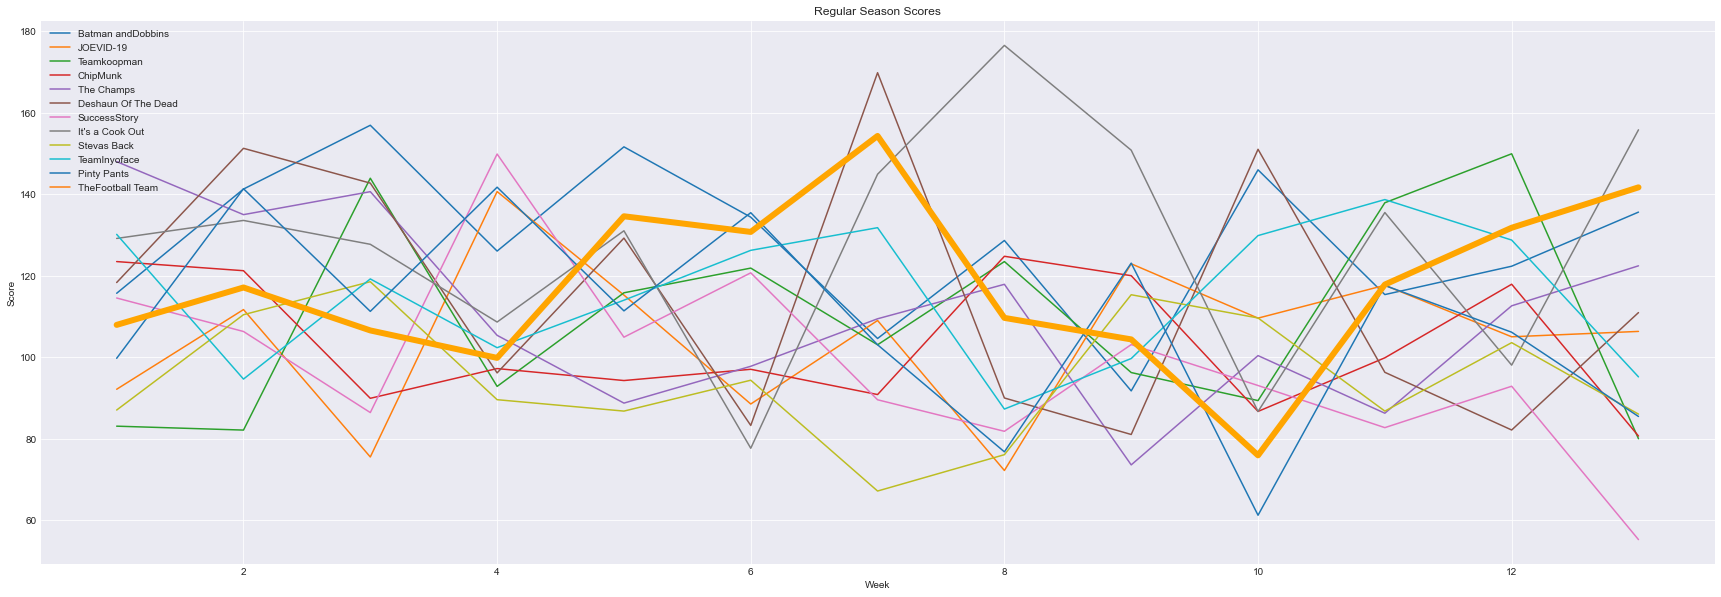

In [32]:
plt.figure(figsize=(30,10))
plt.style.use('seaborn-darkgrid')

for i in range(len(teams)):
    plt.plot(frames[i]['week'],frames[i]['score'])
    
plt.legend(labels=teams['team_name'])

plt.plot(frames[11]['week'],frames[11]['score'],color='orange',linewidth=6)
plt.xlabel('Week')
plt.ylabel('Score')
plt.title('Regular Season Scores')
plt.savefig('Images/regular_season_scores.png')
plt.show()


In [33]:
# team_avg_list = [round(scores.loc[scores['team_id'] == i+1]['score'].mean(),2) for i in range(len(teams))]
# team_id = teams['team_id'].tolist()
# team_name = teams['team_name'].tolist()

# team_avg = pd.DataFrame({"team_id":team_id,
#                          "team_name":team_name,
#                          "team_avg":team_avg_list})

# team_avg


In [58]:
team_stats = pd.DataFrame(scores.groupby('team_id').agg({'score' : [np.mean,
                                                                    np.median,
                                                                    np.var,
                                                                    np.std]}))
team_stats = round(team_stats['score'],2).reset_index()

team_stats.to_csv('CSV/team_stats.csv',index=False)
team_stats

,team_id,mean,median,var,std
0,1,128.45,128.62,350.13,18.71
1,2,105.08,108.98,360.39,18.98
2,3,109.17,103.02,602.93,24.55
3,4,103.34,97.18,247.95,15.75
4,5,110.59,109.40,486.11,22.05
5,6,115.52,110.92,932.36,30.53
6,7,98.51,93.02,516.67,22.73
7,8,127.36,131.00,795.28,28.20
8,9,94.68,89.54,244.56,15.64
9,10,115.18,119.18,299.93,17.32


In [59]:
week_stats = pd.DataFrame(scores.groupby('week').agg({'score' : [np.mean,
                                                                 np.median,
                                                                 np.var,
                                                                 np.std]}))
week_stats = round(week_stats['score'],2).reset_index()

week_stats.to_csv('CSV/week_stats.csv',index=False)
week_stats

,week,mean,median,var,std
0,1,112.41,115.08,375.64,19.38
1,2,120.47,119.14,429.92,20.73
2,3,118.25,118.84,652.30,25.54
3,4,112.49,103.82,451.86,21.26
4,5,114.77,114.59,383.45,19.58
5,6,108.97,109.21,451.52,21.25
6,7,114.76,106.77,882.73,29.71
7,8,105.39,99.79,943.75,30.72
8,9,106.79,103.70,444.30,21.08
9,10,103.25,96.69,751.59,27.42


In [36]:
scores.loc[scores['team_id']==12]

,week,team_id,score
143,1,12,107.90
144,2,12,117.08
145,3,12,106.54
146,4,12,99.80
147,5,12,134.56
148,6,12,130.72
149,7,12,154.28
150,8,12,109.62
151,9,12,104.34
152,10,12,75.88
